In [41]:
import pandas as pd
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_validate
import statistics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from classification_utils import *

In [42]:
data = pd.read_csv("dataset/cleaned_user_profiles.csv", index_col=0)

In [43]:
data.head()

,name,lang,bot,created_at,statuses_count,avg_length,avg_special_chars,urls_ratio,mentions_ratio,hashtags_ratio,reply_count_mean,reply_count_std,reply_count_entropy,favorite_count_mean,favorite_count_std,favorite_count_entropy,retweet_count_mean,retweet_count_std
2353593986,Lamonica Raborn,en,1,2019-02-22 18:00:42,76,62.340909,14.015152,0.000000,0.272727,0.098485,0.0,0.0,0.0,0.037879,0.190903,1.609438,0.037879,0.190903
2358850842,Lourie Botton,en,0,2019-02-26 03:02:32,4,69.082645,15.041322,0.000000,0.338843,0.024793,0.0,0.0,0.0,0.049587,0.217090,1.791759,0.024793,0.155495
137959629,Dadan Syarifudin,en,1,2015-04-30 07:09:56,7,65.340909,14.694444,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
466124818,Carletto Focia,it,1,2017-01-18 02:49:18,50,86.944871,18.689463,0.022331,0.006281,0.072575,0.0,0.0,0.0,0.165387,0.530838,5.105129,0.826239,13.034008
2571493866,MBK Ebook,en,0,2019-06-18 19:30:21,8,72.311246,14.582073,0.000825,0.506461,0.118229,0.0,0.0,0.0,0.056365,0.243387,5.248623,0.016772,0.142619


In [44]:
#a descrption of the dataset
data.describe()

,bot,statuses_count,avg_length,avg_special_chars,urls_ratio,mentions_ratio,hashtags_ratio,reply_count_mean,reply_count_std,reply_count_entropy,favorite_count_mean,favorite_count_std,favorite_count_entropy,retweet_count_mean,retweet_count_std
count,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000
mean,0.531456,49.622176,67.100135,15.045892,0.031045,0.329076,0.088484,0.001967,0.023941,0.058472,0.084281,0.365536,2.680103,1.357545,14.574041
std,0.499031,78.524757,12.755296,2.454106,0.053379,0.315589,0.070828,0.007796,0.068508,0.230465,0.109621,0.408358,2.353441,2.827068,23.390000
min,0.000000,0.000000,32.500000,9.644166,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,7.000000,59.686796,13.553296,0.000000,0.010260,0.045455,0.000000,0.000000,0.000000,0.017751,0.136692,0.450561,0.010526,0.104251
50%,1.000000,12.000000,65.340909,14.694444,0.005109,0.300971,0.070423,0.000000,0.000000,0.000000,0.045752,0.230747,1.945910,0.043478,0.238606
75%,1.000000,55.000000,74.254999,16.772205,0.037445,0.450781,0.113295,0.000000,0.000000,0.000000,0.088862,0.451218,5.065383,0.949402,24.144412
max,1.000000,291.000000,104.449541,22.000000,0.287760,1.210354,0.337268,0.044444,0.333767,1.386294,0.529903,2.183383,8.187960,12.902439,198.461303


In [45]:
#check if there is any null value
data.isnull().values.any()

False

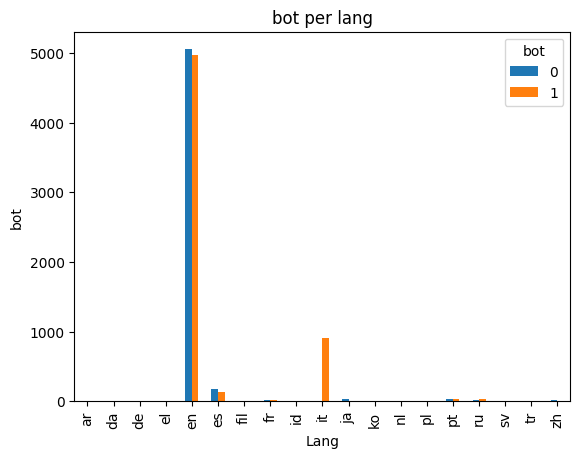

In [46]:
plot_lang_hist(data)

In [47]:
data = data.join(pd.get_dummies(data["lang"]))

In [48]:
train_set, test_set, train_label, test_label = prepare_data(data)

Classification features : ['statuses_count', 'avg_length', 'avg_special_chars', 'urls_ratio', 'mentions_ratio', 'hashtags_ratio', 'reply_count_mean', 'reply_count_std', 'reply_count_entropy', 'favorite_count_mean', 'favorite_count_std', 'favorite_count_entropy', 'retweet_count_mean', 'retweet_count_std', 'ar', 'da', 'de', 'el', 'en', 'es', 'fil', 'fr', 'id', 'it', 'ja', 'ko', 'nl', 'pl', 'pt', 'ru', 'sv', 'tr', 'zh']


In [49]:
train_set.head()

,statuses_count,avg_length,avg_special_chars,urls_ratio,mentions_ratio,hashtags_ratio,reply_count_mean,reply_count_std,reply_count_entropy,favorite_count_mean,...,it,ja,ko,nl,pl,pt,ru,sv,tr,zh
617824831,30,50.846154,11.205128,0.000000,0.076923,0.102564,0.0,0.316124,0.0,0.282051,...,0,0,0,0,0,0,0,0,0,0
1125979442,3,73.041667,21.416667,0.041667,0.083333,0.000000,0.0,0.000000,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,0
1174855417,2,57.809524,12.333333,0.000000,0.000000,0.142857,0.0,0.212959,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,0
2351503404,4,61.905797,13.572464,0.000000,0.340580,0.101449,0.0,0.000000,0.0,0.065217,...,0,0,0,0,0,0,0,0,0,0
2363170070,61,61.244444,13.622222,0.000000,0.318519,0.074074,0.0,0.000000,0.0,0.044444,...,0,0,0,0,0,0,0,0,0,0


In [10]:
train_label.head()

145602813     1
387026133     0
617214370     1
2357961930    1
2369025158    0
Name: bot, dtype: int64

### Usage of Lang

In [11]:
scaler = StandardScaler()

train_X = scaler.fit_transform(train_set.values)
test_X = scaler.transform(test_set.values)

In [12]:
# make grid search

parameters = {
    'kernel':('linear', 'rbf', 'poly', 'sigmoid'), 
    'C':[0.1, 1, 10],
    'gamma' : ['scale', 'auto'],
}

svc = SVC()

grid_search = GridSearchCV(svc, parameters)


grid_search.fit(train_X, train_label)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ('linear', 'rbf', 'poly', 'sigmoid')})

In [13]:
clf = grid_search.best_estimator_

In [14]:
clf

SVC(C=10, kernel='linear')

In [15]:
#predict on the test set
train_pred = clf.predict(train_X)
test_pred = clf.predict(test_X)

In [16]:
print_metrics(train_label, train_pred, test_label, test_pred)

Accuracy train set  0.9931719428926132
Accuracy test set  0.9918911091804228
Precision train set  0.9931883559799112
Recall train set  0.9931719428926132
F1 score train set  0.9931705371161718
Support train set  (array([0.99599893, 0.99071064]), array([0.98940117, 0.99649615]), array([0.99268909, 0.99359497]), array([3774, 4281]))


In [17]:
#compute the performance of the model
report_scores(test_label,test_pred)

              precision    recall  f1-score   support

        <=50       1.00      0.99      0.99      1618
         >50       0.99      1.00      0.99      1835

    accuracy                           0.99      3453
   macro avg       0.99      0.99      0.99      3453
weighted avg       0.99      0.99      0.99      3453



In [18]:
# cross validation
scores = cross_validate(clf, train_X, train_label, cv=3, return_train_score= True)
print('Fit time ', statistics.mean(scores['fit_time']))
print('Score time ', statistics.mean(scores['score_time']))
print('Test score ', statistics.mean(scores['test_score']))
print('Train score ', statistics.mean(scores['train_score']))

Fit time  0.15508667627970377
Score time  0.011409997940063477
Test score  0.991806331471136
Train score  0.9926753569211669


/Users/lucamoroni/Desktop/__WorkSpace/__Universita/unipi/DataMining/Data_Mining_22_23/venv/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


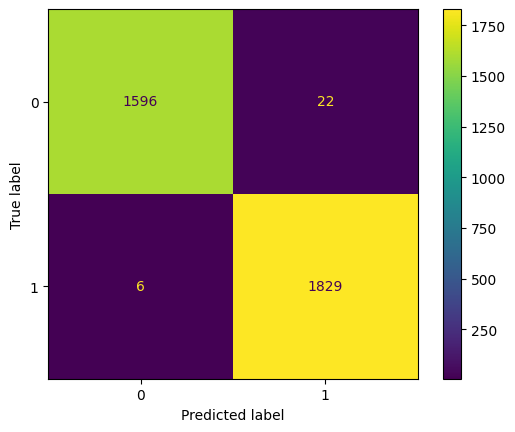

In [19]:
#it is possible to plot the confusion matrix 
#compute confusion matrix
cm = confusion_matrix(test_label, test_pred)
plot_confusion_matrix(clf, test_X, test_label)
plt.show() 

In [20]:
pca = PCA(n_components=2)
test_set_reduced = pca.fit_transform(test_set.values)

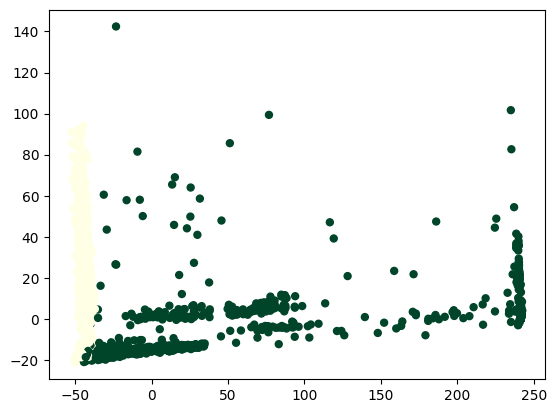

In [21]:
#true labels
from sklearn.datasets import make_blobs
plt.scatter(test_set_reduced[:, 0], test_set_reduced[:, 1], c=test_label, s=25, cmap='YlGn');

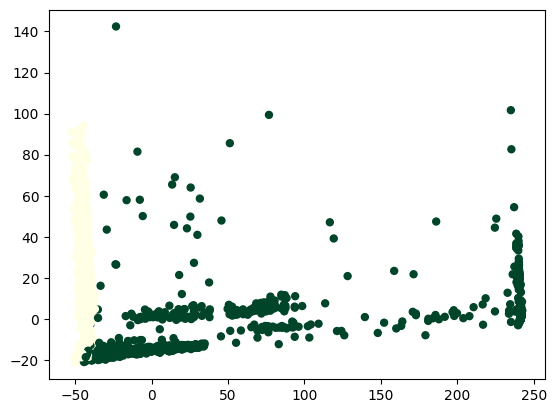

In [22]:
#predicted labels
plt.scatter(test_set_reduced[:, 0], test_set_reduced[:, 1], c=test_pred, s=25, cmap='YlGn');

### Removed Lang Attribute for classification

In [23]:
train_set.head()

,statuses_count,avg_length,avg_special_chars,urls_ratio,mentions_ratio,hashtags_ratio,reply_count_mean,reply_count_std,reply_count_entropy,favorite_count_mean,...,it,ja,ko,nl,pl,pt,ru,sv,tr,zh
145602813,288,77.022801,14.694444,0.005109,0.029316,0.032573,0.0,0.000000,0.000000,0.387622,...,0,0,0,0,0,0,0,0,0,0
387026133,9,42.945120,14.694444,0.072182,0.456880,0.016221,0.0,0.000000,0.000000,0.014869,...,0,0,0,0,0,0,0,0,0,0
617214370,43,64.653846,16.173077,0.000000,0.000000,0.134615,0.0,0.330859,1.039721,0.000000,...,0,0,0,0,0,0,0,0,0,0
2357961930,50,63.853448,14.017241,0.000000,0.387931,0.060345,0.0,0.000000,0.000000,0.094828,...,0,0,0,0,0,0,0,0,0,0
2369025158,7,61.192308,13.076923,0.000000,0.326923,0.038462,0.0,0.000000,0.000000,0.038462,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29062641,10,59.613228,12.990654,0.178648,0.378505,0.270669,0.0,0.000000,0.000000,0.107477,...,0,0,0,0,0,0,0,0,0,0
2384089693,45,59.926606,12.889908,0.000000,0.339450,0.045872,0.0,0.000000,0.000000,0.073394,...,0,0,0,0,0,0,0,0,0,0
711316272,8,52.451493,11.370421,0.035957,0.812076,0.106852,0.0,0.000000,0.000000,0.332090,...,0,0,0,0,0,0,0,0,0,0
616331366,48,60.172414,16.293103,0.000000,0.000000,0.258621,0.0,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0


In [24]:
for lang in data.lang.unique():
    del train_set[lang]
    del test_set[lang]

In [25]:
train_set.head()

,statuses_count,avg_length,avg_special_chars,urls_ratio,mentions_ratio,hashtags_ratio,reply_count_mean,reply_count_std,reply_count_entropy,favorite_count_mean,favorite_count_std,favorite_count_entropy,retweet_count_mean,retweet_count_std
145602813,288,77.022801,14.694444,0.005109,0.029316,0.032573,0.0,0.000000,0.000000,0.387622,0.230747,1.551809,0.000000,0.000000
387026133,9,42.945120,14.694444,0.072182,0.456880,0.016221,0.0,0.000000,0.000000,0.014869,0.123242,3.982128,0.043478,81.816053
617214370,43,64.653846,16.173077,0.000000,0.000000,0.134615,0.0,0.330859,1.039721,0.000000,0.000000,0.000000,0.019231,0.137335
2357961930,50,63.853448,14.017241,0.000000,0.387931,0.060345,0.0,0.000000,0.000000,0.094828,0.321056,2.271869,0.060345,0.238125
2369025158,7,61.192308,13.076923,0.000000,0.326923,0.038462,0.0,0.000000,0.000000,0.038462,0.192308,1.386294,0.000000,0.000000


In [26]:
scaler = StandardScaler()

train_X = scaler.fit_transform(train_set.values)
test_X = scaler.transform(test_set.values)

In [27]:
# make grid search

parameters = {
    'kernel':('linear', 'rbf', 'poly', 'sigmoid'), 
    'C':[0.1, 1, 10],
    'gamma' : ['scale', 'auto'],
}

svc = SVC()

grid_search = GridSearchCV(svc, parameters)


grid_search.fit(train_X, train_label)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ('linear', 'rbf', 'poly', 'sigmoid')})

In [28]:
clf = grid_search.best_estimator_

In [29]:
clf

SVC(C=1, kernel='linear')

In [30]:
#predict on the test set
train_pred = clf.predict(train_X)
test_pred = clf.predict(test_X)

In [31]:
print_metrics(train_label, train_pred, test_label, test_pred)

Accuracy train set  0.9931719428926132
Accuracy test set  0.9916015059368665
Precision train set  0.9931720805471543
Recall train set  0.9931719428926132
F1 score train set  0.9931719963532022
Support train set  (array([0.99258278, 0.99369159]), array([0.99284579, 0.99345947]), array([0.99271427, 0.99357552]), array([3774, 4281]))


In [32]:
#compute the performance of the model
report_scores(test_label,test_pred)

              precision    recall  f1-score   support

        <=50       0.99      0.99      0.99      1618
         >50       0.99      0.99      0.99      1835

    accuracy                           0.99      3453
   macro avg       0.99      0.99      0.99      3453
weighted avg       0.99      0.99      0.99      3453



In [33]:
# cross validation
scores = cross_validate(clf, train_X, train_label, cv=3, return_train_score= True)
print('Fit time ', statistics.mean(scores['fit_time']))
print('Score time ', statistics.mean(scores['score_time']))
print('Test score ', statistics.mean(scores['test_score']))
print('Train score ', statistics.mean(scores['train_score']))

Fit time  0.0967870553334554
Score time  0.022560675938924152
Test score  0.9914338919925512
Train score  0.9919304779639975


/Users/lucamoroni/Desktop/__WorkSpace/__Universita/unipi/DataMining/Data_Mining_22_23/venv/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


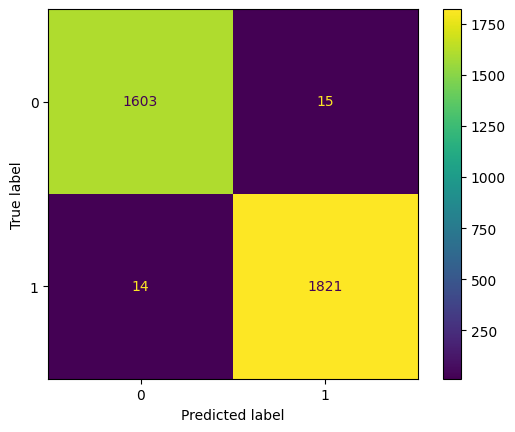

In [34]:
#it is possible to plot the confusion matrix 
#compute confusion matrix
cm = confusion_matrix(test_label, test_pred)
plot_confusion_matrix(clf, test_X, test_label)
plt.show() 

In [35]:
pca = PCA(n_components=2)
test_set_reduced = pca.fit_transform(test_set.values)

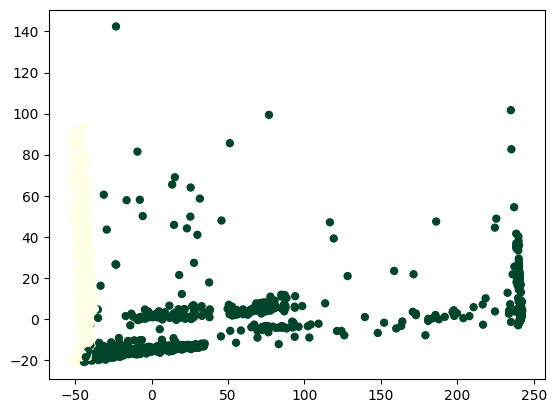

In [36]:
#true labels
from sklearn.datasets import make_blobs
plt.scatter(test_set_reduced[:, 0], test_set_reduced[:, 1], c=test_label, s=25, cmap='YlGn');

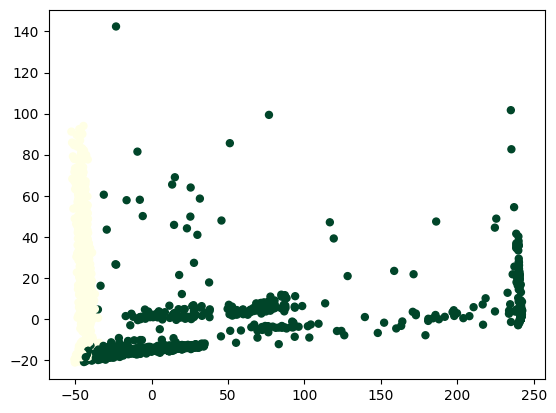

In [37]:
#predicted labels
plt.scatter(test_set_reduced[:, 0], test_set_reduced[:, 1], c=test_pred, s=25, cmap='YlGn');